In [11]:
import numpy as np
import dimod
from dimod import BQM
#import dwave_networkx as dnx
import matplotlib.pyplot as plt
import networkx as nx
from dimod.reference.samplers import ExactSolver


QUBO = np.zeros((5,5))
QUBO

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [18]:
QUBO[0][0] = -2
QUBO[1][1] = -1
QUBO[2][2] = -3
QUBO[3][3] = -2
QUBO[4][4] = -2
QUBO[0][1] = 2
QUBO[0][2] = 2
QUBO[2][3] = 2
QUBO[2][4] = 2
QUBO[3][4] = 2
QUBO

array([[-2.,  2.,  2.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.],
       [ 0.,  0., -3.,  2.,  2.],
       [ 0.,  0.,  0., -2.,  2.],
       [ 0.,  0.,  0.,  0., -2.]])

In [19]:
%run qubo_functions.py

In [20]:
qubo_solver(QUBO)

'The vector (1, 0, 0, 1, 1) minimizes the objective function to a value of -4.0.'

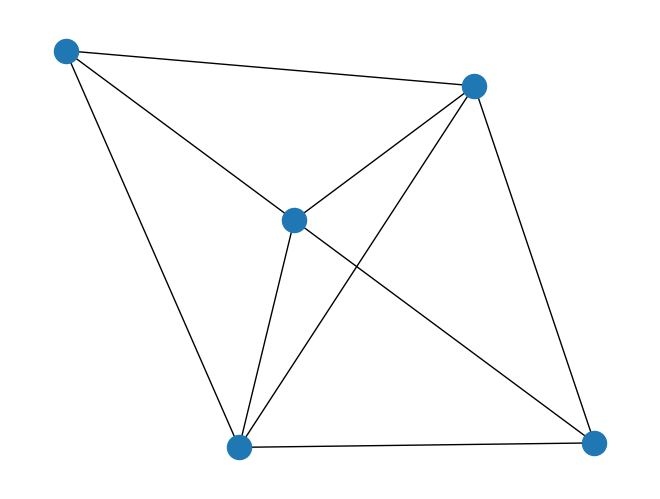

In [7]:
import networkx as nx

G = nx.turan_graph(5, 4)
nx.draw(G)

In [12]:
from collections import defaultdict

# defaultdict(int) initializes all dictionary values to 0
d = defaultdict(int)

# We consider each edge one by one and update the coefficients accordingly
for i, j in G.edges:
    d[(i, i)] += -1
    d[(j, j)] += -1
    d[(i, j)] += 2
    
bqm = BQM.from_qubo(d)

sampler = ExactSolver()
sampleset = sampler.sample(bqm)

print(sampleset)

    0  1  2  3  4 energy num_oc.
2   1  1  0  0  0   -6.0       1
4   0  1  1  0  0   -6.0       1
5   1  1  1  0  0   -6.0       1
6   1  0  1  0  0   -6.0       1
16  0  0  0  1  1   -6.0       1
17  1  0  0  1  1   -6.0       1
19  0  1  0  1  1   -6.0       1
23  0  0  1  1  1   -6.0       1
8   0  0  1  1  0   -5.0       1
9   1  0  1  1  0   -5.0       1
11  0  1  1  1  0   -5.0       1
12  0  1  0  1  0   -5.0       1
13  1  1  0  1  0   -5.0       1
14  1  0  0  1  0   -5.0       1
24  0  0  1  0  1   -5.0       1
25  1  0  1  0  1   -5.0       1
27  0  1  1  0  1   -5.0       1
28  0  1  0  0  1   -5.0       1
29  1  1  0  0  1   -5.0       1
30  1  0  0  0  1   -5.0       1
1   1  0  0  0  0   -4.0       1
3   0  1  0  0  0   -4.0       1
7   0  0  1  0  0   -4.0       1
18  1  1  0  1  1   -4.0       1
20  0  1  1  1  1   -4.0       1
22  1  0  1  1  1   -4.0       1
10  1  1  1  1  0   -3.0       1
15  0  0  0  1  0   -3.0       1
26  1  1  1  0  1   -3.0       1
31  0  0  